In [1]:
#  MVRegressor.py
#  G. Cowan / RHUL Physics / November 2021
#  Simple program to illustrate regression with scikit-learn

import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#  read the data in from file
events = np.loadtxt('trainingData.txt')
nEvt = events.shape[0]
X = events[:,1:]        # eta, s1, s2, s3
y = events[:,0]         # E
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [3]:
# create regressor object, train and test
model = "MLP"                         # choose one of the options
if model == "linear":
    regr = linear_model.LinearRegression()
    model_label = "Linear regressor"
elif model == "MLP":
    arch = (10,20,20,10)
    regr = MLPRegressor(hidden_layer_sizes=arch, activation='relu', max_iter=2000, random_state=1)
    model_label = f'MLP regressor ' + str(arch)
elif model == "SignalSum":
    regr = linear_model.LinearRegression()
    model_label = "Sum of raw signals"
    X_train = X_train[:,1:2] + X_train[:,2:3] + X_train[:,3:]
    X_test  = X_test[:,1:2]  + X_test[:,2:3]  + X_test[:,3:]

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
R2 = regr.score(X_test, y_test)
print(f"Test R2 score: {R2:.3f}")

Test R2 score: 0.959


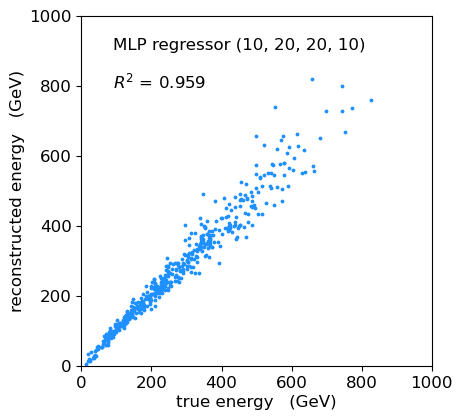

<Figure size 640x480 with 0 Axes>

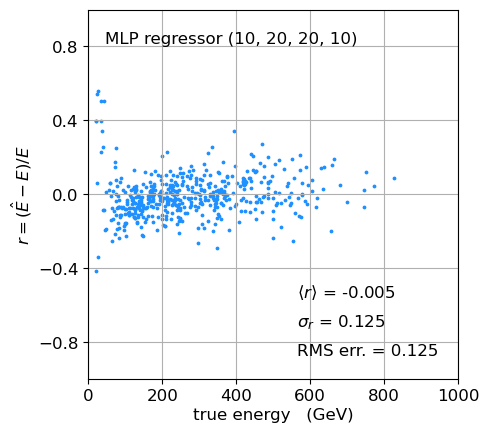

In [4]:
# make plots
matplotlib.rcParams.update({'font.size':12})
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
ax.set_xlim((0.,1000.))
ax.set_ylim((0.,1000.))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))    # make square plot
xtick_spacing = 200
ytick_spacing = 200
ax.yaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))
plt.xlabel('true energy   (GeV)', labelpad=3)
plt.ylabel('reconstructed energy   (GeV)', labelpad=3)
plt.scatter(y_test, y_pred, s=3, color='dodgerblue', marker='o', label=model_label)
plt.figtext(0.3, 0.81, model_label)
plt.figtext(0.3, 0.73, f'$R^2$ = {R2:.3f}')
plt.show()
plt.savefig("scatterplot.pdf", format='pdf')

fig, ax = plt.subplots(1,1)
ax.set_xlim((0.,1000.))
ax.set_ylim((-1,1.))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))    # make square plot
xtick_spacing = 200
ytick_spacing = 0.4
plt.grid(True)
ax.yaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))
plt.xlabel('true energy   (GeV)', labelpad=3)
plt.ylabel(r'$r = (\hat{E}-E)/E$', labelpad=3)
residual = (y_test - y_pred)/y_pred
mean_resid = residual.mean()
sigma_resid = residual.std()
rootMSE = np.sqrt(sigma_resid**2 + mean_resid**2)
plt.scatter(y_test, residual, s=3, color='dodgerblue', marker='o')
plt.figtext(0.25, 0.81, model_label)
plt.figtext(0.55, 0.28, f'$\\langle r \\rangle$ = {mean_resid:.3f}')
plt.figtext(0.55, 0.22, f'$\sigma_r$ = {sigma_resid:.3f}')
plt.figtext(0.55, 0.16, f'RMS err. = {rootMSE:.3f}')
plt.show()
plt.savefig("resolution.pdf", format='pdf')